In [1]:
import numpy as np
import os
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
plt.rcParams['font.sans-serif'] = 'Arial'
plt.rcParams['axes.labelsize'] = 14
plt.rcParams['axes.titlesize'] = 16
import warnings
warnings.filterwarnings('ignore')
np.random.seed(42)

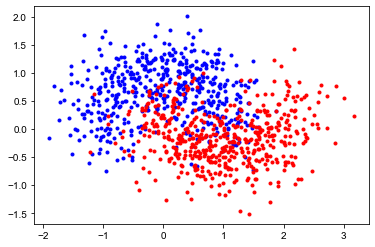

In [2]:
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_moons
X,y = make_moons(n_samples=1000, noise=0.4, random_state=42)

plt.plot(X[:,0][y==0],X[:,1][y==0],'b.')
plt.plot(X[:,0][y==1],X[:,1][y==1],'r.')
plt.show()

X_train, X_test, y_train, y_test = train_test_split(X,y)

In [5]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score


## 用单个决策树

In [6]:
tree_clf = DecisionTreeClassifier(random_state=0)
tree_clf.fit(X_train, y_train)
y_pre_tree = tree_clf.predict(X_test)
accuracy_score(y_test, y_pre_tree)

0.824

## 随机森林

In [46]:
from sklearn.ensemble import RandomForestClassifier
rng = RandomForestClassifier(n_estimators=200,
                      bootstrap=True,
                      max_samples=100,
                      n_jobs=-1,
                      random_state=0)
rng.fit(X_train, y_train)
y_pre_rng = rng.predict(X_test)
accuracy_score(y_test, y_pre_rng)

0.848

## bagging

In [34]:
bagg_clf = BaggingClassifier(
    base_estimator=DecisionTreeClassifier(),
    n_estimators=200,
    max_samples=100,
    n_jobs=-1,
    random_state=0
)
bagg_clf.fit(X_train, y_train)
y_pre_bagg = bagg_clf.predict(X_test)
accuracy_score(y_test, y_pre_bagger)

0.856

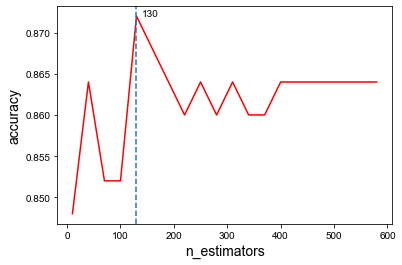

In [32]:
estimator_list = list(range(10,600,30))
accuracy_list = []

bagger_list = [BaggingClassifier(
    base_estimator=DecisionTreeClassifier(),
    n_estimators=estimator,
    max_samples=100,
    n_jobs=-1,
    random_state=0
) for estimator in estimator_list]

for each_clf in bagger_list:
    each_clf.fit(X_train, y_train)
    y_pre = each_clf.predict(X_test)
    accuracy_list.append(accuracy_score(y_test, y_pre))

max_values = estimator_list[np.argmax(np.array(accuracy_list))]

plt.plot(estimator_list, accuracy_list,'r-')
plt.axvline(max_values,ls='--')
plt.text(max_values+10, max(accuracy_list),f'{max_values}')
plt.xlabel('n_estimators')
plt.ylabel("accuracy")
plt.show()

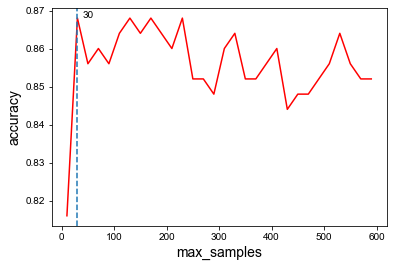

In [33]:
sample_list = list(range(10,600,20))
accuracy_list = []

bagger_list = [BaggingClassifier(
    base_estimator=DecisionTreeClassifier(),
    n_estimators=130,
    max_samples=sample,
    n_jobs=-1,
    random_state=0
) for sample in sample_list]

for each_clf in bagger_list:
    each_clf.fit(X_train, y_train)
    y_pre = each_clf.predict(X_test)
    accuracy_list.append(accuracy_score(y_test, y_pre))

max_values = sample_list[np.argmax(np.array(accuracy_list))]

plt.plot(sample_list, accuracy_list,'r-')
plt.axvline(max_values,ls='--')
plt.text(max_values+10, max(accuracy_list),f'{max_values}')
plt.xlabel('max_samples')
plt.ylabel("accuracy")
plt.show()

## 绘制决策边界

In [41]:
from matplotlib.colors import ListedColormap
def plot_decision_boundary(clf, X, y, feature_names=["x","y"], target_names=[0,1],
                           axis=[-2, 4, -2, 3],legend=True,
                           plot_training=True, title='Decision boundary'):
    custom_cmap = ListedColormap(['y','#9898ff','#a0faa0'])
    custom_cmap2 = ListedColormap(['#7d7d58','#4c4c7f','#505d50'])
    
    x1s = np.linspace(axis[0],axis[1],100)
    x2s = np.linspace(axis[2],axis[3],100)
    x1,x2 = np.meshgrid(x1s,x2s)
    #print(x1.shape)
    
    X_new = np.c_[x1.flatten(), x2.flatten()]
    y_pred = clf.predict(X_new).reshape(x1.shape)
    
    plt.contourf(x1,x2,y_pred,cmap=custom_cmap,alpha=0.3)
    plt.contour(x1,x2,y_pred,cmap=custom_cmap2,alpha=0.8)
    
    if plot_training:
        for index,name in enumerate(target_names):
            plt.scatter(X[:,0][y==index], X[:,1][y==index],label=name)
    if legend:
        plt.legend()
            
    plt.xlabel(feature_names[0])
    plt.ylabel(feature_names[1])
    plt.title(title)

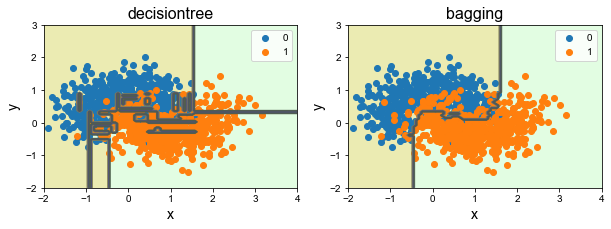

In [43]:
plt.figure(figsize=(10,3))
plt.subplot(121)
plot_decision_boundary(tree_clf, X, y, title="decisiontree")
plt.subplot(122)
plot_decision_boundary(bagg_clf, X, y, title="bagging")
plt.show()

## oob scores

In [53]:
rng = RandomForestClassifier(n_estimators=200,
                      bootstrap=True,
                             oob_score=True,
                      max_samples=100,
                      n_jobs=-1,
                      random_state=0)
rng.fit(X_train, y_train)
print(rng.oob_score_)

y_pre_rng = rng.predict(X_test)
accuracy_score(y_test, y_pre_rng)

0.8533333333333334


0.848

In [54]:
bagg_clf = BaggingClassifier(
    base_estimator=DecisionTreeClassifier(),
        oob_score=True,
    n_estimators=200,
    max_samples=100,
    n_jobs=-1,
    random_state=0
)
bagg_clf.fit(X_train, y_train)
print(bagg_clf.oob_score_)
y_pre_bagg = bagg_clf.predict(X_test)
accuracy_score(y_test, y_pre_bagger)

0.8493333333333334


0.856

## feature_importance_

In [59]:
# decision tree
from sklearn.datasets import load_iris
iris = load_iris()
tree_clf = DecisionTreeClassifier()
tree_clf.fit(iris.data, iris.target)

for name,importantance in zip(iris.feature_names, tree_clf.feature_importances_):
    print(name, importantance)

sepal length (cm) 0.013333333333333332
sepal width (cm) 0.013333333333333332
petal length (cm) 0.5507226247987118
petal width (cm) 0.42261070853462157


In [62]:
# randomforest - much more accuracy
forest_clf = RandomForestClassifier()
forest_clf.fit(iris.data, iris.target)

for name,importantance in zip(iris.feature_names, forest_clf.feature_importances_):
    print(name, importantance)

sepal length (cm) 0.12418719892495844
sepal width (cm) 0.02441141621519163
petal length (cm) 0.4121141402156708
petal width (cm) 0.43928724464417923


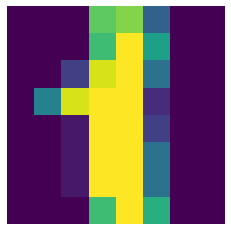

In [76]:
from sklearn.datasets import load_digits
digits = load_digits()
plt.imshow(digits.images[1])
plt.axis("off")
plt.show()

In [78]:
def plot_digit(data,shape=(8,8)):
    image = data.reshape(shape)
    plt.imshow(image, cmap=matplotlib.cm.hot)
    plt.axis("off")

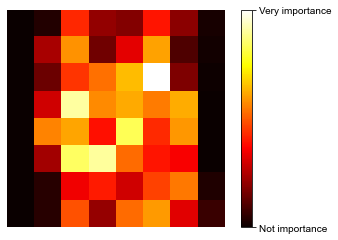

In [87]:
forest_clf.fit(digits.data, digits.target)
plot_digit(forest_clf.feature_importances_)
char = plt.colorbar(ticks=[forest_clf.feature_importances_.min(),forest_clf.feature_importances_.max()])
char.ax.set_yticklabels(["Not importance","Very importance"])
plt.show()